# Introduction to Linear Regression

> "All models are wrong, but some are useful." 
>
> - George Box (British Statistician)

In the last lesson, we saw how to load and plot our data using the plotly.  We applied this to plotting the monthly revenue from Max's Wine Bar in Dallas.  In this lesson, we'll begin to make predictions for future data sets.

## Building on our model

Let's take another look at our revenue data from earlier.

In [38]:
monthly_revenues[0]

{'revenue': 66609, 'month': '2015-09-30T00:00:00.000', 'month_number': 0}

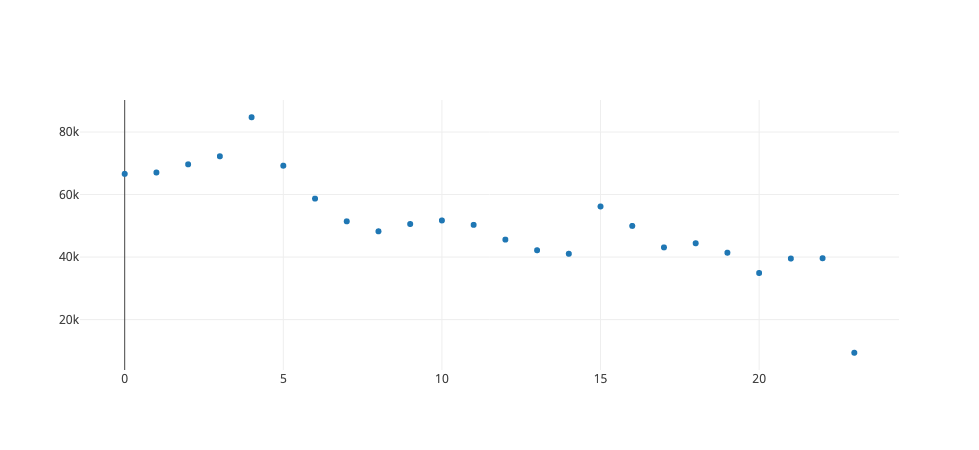

In [37]:
with open('months-since-revenues.json', 'r') as revenue_file:
    monthly_revenues = json.load(revenue_file)

import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

from graph import m_b_data, trace_values

m = -2487.34
b = 66609
predicted_values = m_b_data(m, b, list(range(0, 24)))['y']
actual_values = list(map(lambda monthly_revenue: monthly_revenue['revenue'],monthly_revenues))
months_since_september = list(map(lambda monthly_revenue: monthly_revenue['month_number'],monthly_revenues))

scatter = {'x': months_since_september, 'y': actual_values, 'mode': 'markers', 'name': 'actual'}
line = trace_values(months_since_september, predicted_values, mode = 'lines', name = 'expected')

iplot([scatter])

Now remember what our graph and our blue dots represent.  Our graph represents the number of months after September 2015 horizontally along the x axis.  And it represents the amount of revenue earned in vertically along the y axis.  Each blue dot is a display of the actual revenue earned in that month.  So hovering over the second blue dot we see that the blue dot in that position means that $67,048 was earned in October 2016.

And we know that we can represent that single data point with the pair of coordinates `(1, 67048)`.  We can call this point y actual or simply `y`.

Now our machine learning model of the orange line below is similar.  It represents that amount that it expects to earn in month number 1.  We can call this y expected, or $\hat{y}$ (pronounced y hat).  So in month one, our model expects a revenue of `64,121`.

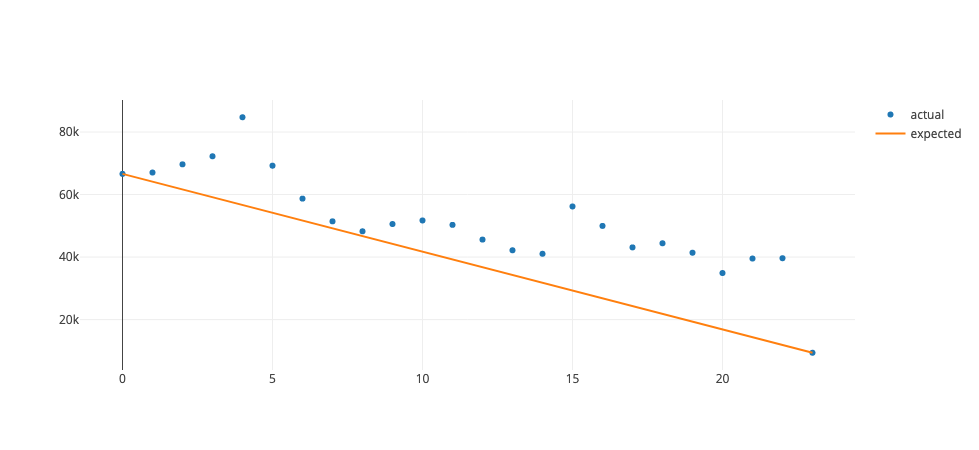

In [40]:
m = -2487.34
b = 66609
predicted_values = m_b_data(m, b, list(range(0, 24)))['y']
actual_values = list(map(lambda monthly_revenue: monthly_revenue['revenue'],monthly_revenues))
months_since_september = list(map(lambda monthly_revenue: monthly_revenue['month_number'],monthly_revenues))

scatter = {'x': months_since_september, 'y': actual_values, 'mode': 'markers', 'name': 'actual'}
line = trace_values(months_since_september, predicted_values, mode = 'lines', name = 'expected')

iplot([scatter, line])

### Generating these predictions

Now what's nice about this orange line above is that no matter what value of x we plug in, it can give us back a predicted revenue, $\hat{y}$.  But how does something like that happen?  What generates a prediction for any value of x that we plug in?  

Well a function does.  Remember however our function works, given an input a function gives us back an output.  Let's see this below.  Let's create a function that that given an input of `x` representing months since Sept. 2015, gives us a predicted revenue of 40000. 

In [42]:
def y_hat(x):
    return 40000

In [43]:
y_hat(2)

40000

In [44]:
y_hat(20)

40000

Now let's use it to generate a line like we have above.

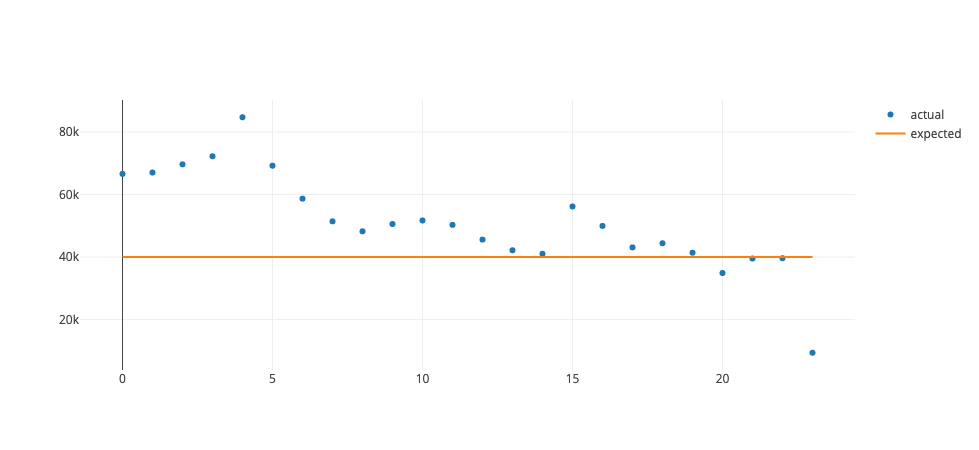

In [51]:
y_hats = list(map(lambda x: 40000, months_since_september))
model = {'x': months_since_september, 'y': y_hats, 'name':'expected'}
iplot([scatter, model])

So we generated this model simply with the our function:

```python
def y_hat(x):
    return 40000
```

And then mapping through our data and returning 40000 for each x value.
```python
y_hats = list(map(lambda x: 40000, months_since_september))
```

To express this as a mathematical function we would write this as $ \hat{y} = 40000$.

One thing to note is that we can `map` through our data and use our `y_hat` function directly to generate the data.

In [73]:
y_hats_from_function = list(map(y_hat, months_since_september))

In [75]:
y_hats_from_function[0:3]

[0, 20000, 40000]

So note that we **do not** write `y_hat(x)`.  Doing so would only execute our function once.  Also note, that we no longer use the `lambda` keyword. Instead we simply reference the name of our function without parentheses, and `map` knows to pass the each element to the function as an argument.

### Varying our output with x

Ok, so far we saw that we can generate a prediction for each input that we have with a function that returns a value which represents our `y_hat` for that value of `x`.  To display our line, we simply mapped through our x values, passing each x value to our function.  And we saw that we can express this function mathematically as $ \hat{y} = 40000$.  This function is called a constant function, because no matter what the input of `x` that we provide our prediction will be the same or constant.

Ok, now let's move on to a function that is not constant.  

$\hat{y} = 2,000*x$

Ok, now this function should return different predictions for y as the our input values of x vary.  Let's try it!  

First, we write express our function in code as the following.

In [85]:
def y_hat(x):
    return 2000*x

And now we have a function that will return us a different predicted value $\hat{y}$ for each input value of $x$.

In [86]:
y_hat(2)

4000

In [87]:
y_hat(3)

6000

So this is saying that for each month after Sept. 2015, revenue increases by 20,000.  Let's see what this looks like as a plot.  Once again, we create our trace by passing through out x_values, our list `months_since_september`.  And we create our `y_hats` by mapping through our x values and passing value as an argument to our updated `y_hat` formula.

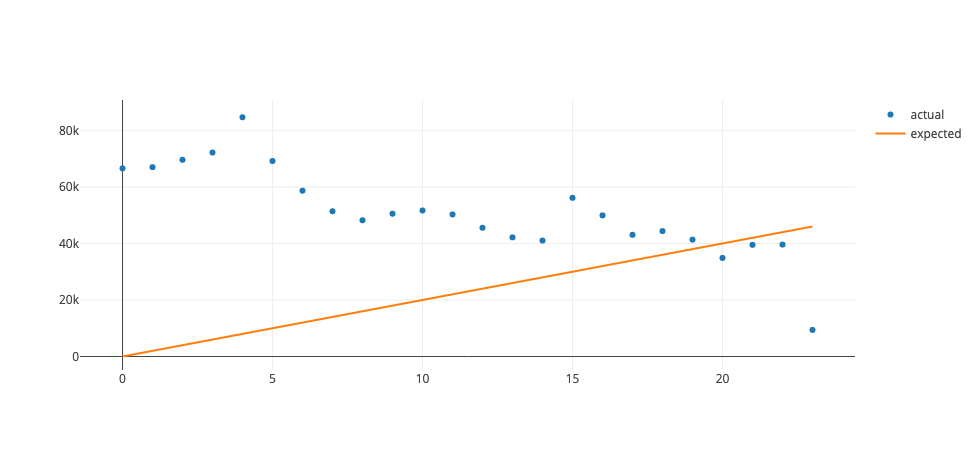

In [88]:
varying_y_hats = list(map(y_hat, months_since_september))

varying_model = {'x': months_since_september, 'y': varying_y_hats, 'name':'expected'}
varying_model
iplot([scatter, varying_model])

Once again, not a great model.  However, notice how we are able to generate a sloped line.  For every one unit increase in x, our y value increase by 20,000.  

In [90]:
def y_hat(x):
    return 2000*x

y_hat(1) # 2000
y_hat(2) # 4000
y_hat(3) # 6000

6000

So with each one value increase in x *our increase* in y stays constant.  This is a linear equation.  We can multiply x by whatever we want.  Notice that this will still produce a line.  The only difference will be how steep the line is.  The larger the number x by the steeper the line, and vice versa.  Replace the number 2000 with different numbers to see how the line changes.  If we want to point the line downwards instead of upwards, we multiply x by a negative number.

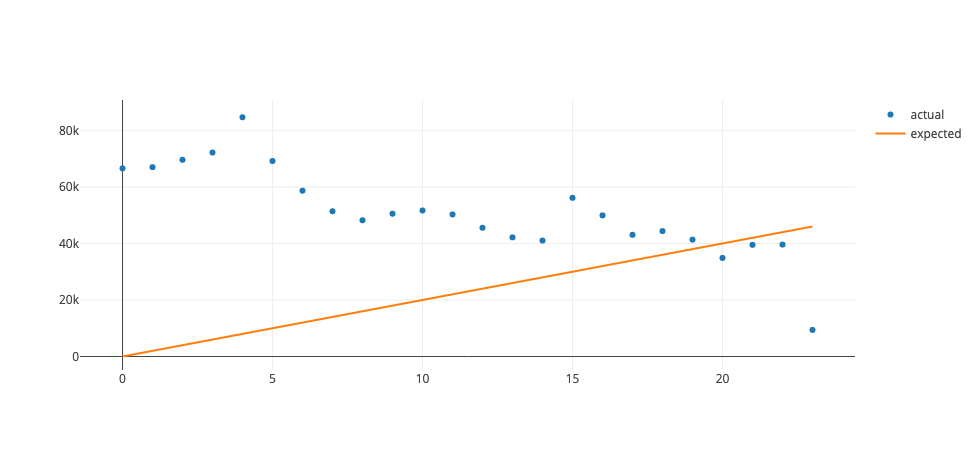

In [91]:
def y_hat(x):
    # change the number 2000 here     
    return 2000*x

varying_y_hats = list(map(y_hat, months_since_september))
varying_model = {'x': months_since_september, 'y': varying_y_hats, 'name':'expected'}
iplot([scatter, varying_model])

### Raising and lowering the line

In the previous section, we saw that we can increase and decrease the slope of the line by multiplying our input $x$ by different numbers.  In this section we'll try to raise the entire line vertically.  For example, let's plot our original line, `y_hat` and then a new line `y_hat_plus_200` to see the difference.

In [102]:
def y_hat(x):
    return 2000*x

def y_hat_plus_ten_thousand(x):
    return 2000*x + 10000

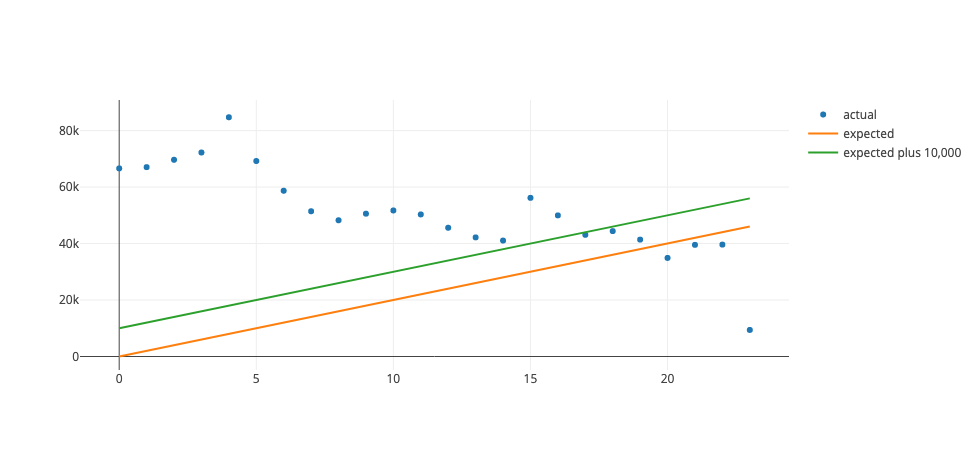

In [104]:
varying_y_hats = list(map(y_hat, months_since_september))
varying_y_hats_plus_ten_thousand = list(map(y_hat_plus_ten_thousand, months_since_september))
varying_model = {'x': months_since_september, 'y': varying_y_hats, 'name':'expected'}
varying_model_plus_ten_thousand = {'x': months_since_september, 'y': varying_y_hats_plus_ten_thousand, 'name':'expected plus 10,000'}

iplot([scatter, varying_model, varying_model_plus_ten_thousand])

So notice what this did.  Our line has exactly the same slope as before, but every expected y value is increase by 10,000.  We can see how this makes sense by inserting single values for our two functions.

In [105]:
def y_hat(x):
    return 2000*x

def y_hat_plus_ten_thousand(x):
    return 2000*x + 10000

In [108]:
y_hat(2) # 4000
y_hat_plus_ten_thousand(2) # 14000

y_hat(3) # 6000
y_hat_plus_ten_thousand(3) # 16000

16000

So notice that the *increase* in outputs from 2 to 3 is the same, the output increase by 2000 for both functions.  And that increase is what we see as the slope of the line.  However, the output is precisely 10000 more for each point returned by `y_hat_plus_ten_thousand`.  So that is why the entire line is shifted upwards.

### The big takeaway

Hopefully now we can see the two ways that we can change our line.  We use a function that takes an input of an x value and returns an output of an expected y value.  We can pass through whichever x value we like.  We change the slope of our line by multiplying a number by x, and we shift the entire line up or down by adding a number.

In [110]:
def y_hat(x):
    slope_of_line = 10
    shift_upwards = 500
    return slope_of_line*x + shift_upwards_or_downwards

Now as you can see these variables `slope_of_line` and `shift_upwards` really determine a lot about our line.  They are so important that mathematicians have given them their own names, `m` for slope of the line, and `b` which is for the *y intercept*.  Because this is the output of the function when `x` equals zero, and when `x` equals zero we intercept the y axis.

So our formula mathematically looks like the following: 

$\hat{y} = mx + b $

where y is the expected value, m is the slope of the line, and b is the y intercept.

Change the values of the variables `m` and `b` to see how our linear regression model updates in the graph below.

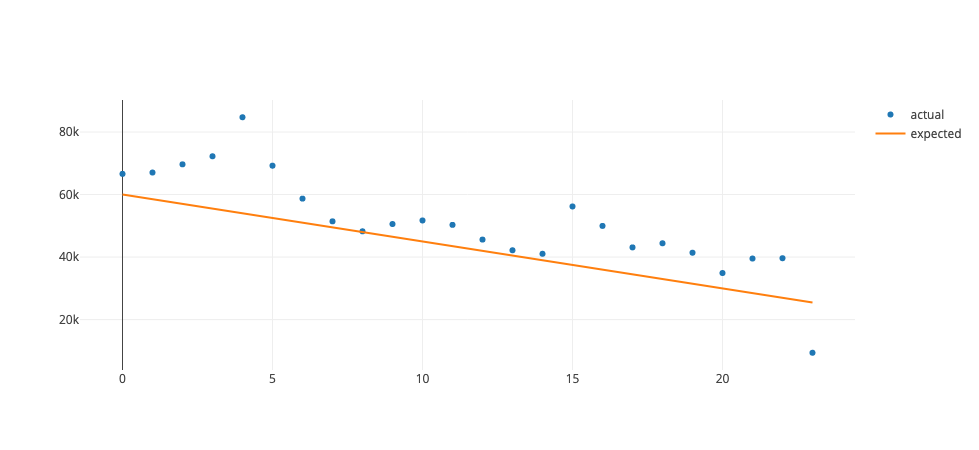

In [125]:
def y_hat(x):
    m = -1500
    b = 60000
    return m*x + b 


varying_y_hats = list(map(y_hat, months_since_september))
varying_model = {'x': months_since_september, 'y': varying_y_hats, 'name':'expected'}
iplot([scatter, varying_model])

### Summary

In this lesson we saw how to generate a linear regression model.  We represented our regression model both mathematically in and in code.  Our linear regression model takes the form $\hat{y} = mx + b $ where $\hat{y}$ is the value our model predicts, `m` is the slope of our linear regression model, and `b` is our y intercept or the value of `y` when our line crosses when the `y-axis`.

We also saw how we can generate our model machine learning model by using code to graph a line.  We do so by first writing our formula as a function that takes in input values of x and returns an output value which is our expected value of y.  

```python
def y_hat(x):
    m = 1
    b = 1
    return m*x + b 
```

The function above will return an output for every passed through input of $x$.  Then to generate a line, we map through the values for which we want to draw a line like so: 

```python
y_hats = list(map(y_hat,x_values))
varying_model = {'x': x_values, 'y': y_hats, 'name':'expected'}
iplot([varying_model])
```

We'll work more with linear regression in the future, but for now, let's see how we can evaluate, and then improve upon our linear regression model.